In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
path = '/content/drive/MyDrive/final_cccf.csv'

In [52]:
df = pd.read_csv(path)
df.head(5)

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0


In [53]:
df.shape

(11275, 5)

In [54]:
df = df.drop(['cf_username', 'cc_username', 'ss_username'] , axis = 1)

In [55]:
df = df.dropna()
df

,cf_rating,cc_rating
0,3449.0,3007.0
4,1703.0,2673.0
5,2202.0,2628.0
6,2262.0,2628.0
7,2023.0,2565.0
...,...,...
10269,624.0,580.0
10270,1182.0,569.0
10272,979.0,518.0
10274,1581.0,460.0


In [56]:
from sklearn.model_selection import train_test_split
X=df['cf_rating'].values.reshape(-1,1)
Y=df['cc_rating'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)

In [57]:
from numpy.linalg import pinv
slope = pinv(X_train).dot(Y_train)
Y_pred = X_test.dot(slope)

In [58]:
intercept = np.array([0]).reshape(-1,1).dot(slope)
c = intercept[0][0]
m = slope[0][0]
print("slope = ", m, " and intercept = ", c)

slope =  1.1873020655567823  and intercept =  0.0


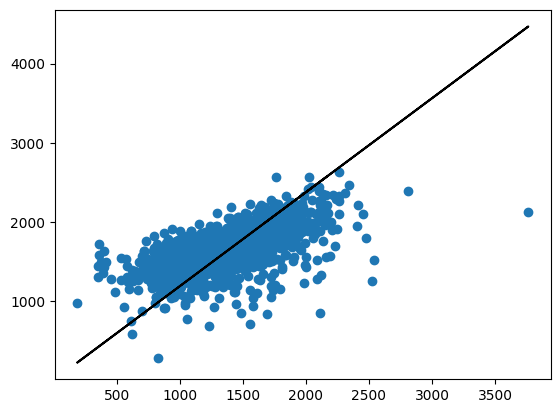

In [59]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color ='black')

## Rating predictor based on this model

In [63]:
n = int(input('''Choose your conversion
1. Codechef to Codeforces
2. Codeforces to Codechef

'''))
if n == 1:
    print()
    rating = int(input("Enter Codechef rating "))
    cf_rating = (rating - c)//m
    print("Your predicted Codeforces rating is ", int(cf_rating))
elif n == 2:
    print()
    rating = int(input("Enter Codeforces rating "))
    cc_rating = (m * rating) + c
    print("Your predicted Codechef rating is ", int(cc_rating))
else:
    print("Enter a valid value")

Choose your conversion
1. Codechef to Codeforces
2. Codeforces to Codechef

2

Enter Codeforces rating 1000
Your predicted Codechef rating is  1187
